## Technical Exam

<p style="font-size:2.5rem;color:black;">Objective:</p> 
<p style="font-size:2rem;color:gray;">1.	Create a denormalized table replacing precinct_code in the results_*.csv files 
with the columns: region, province, municipality, and barangay. </p> 



In [1]:
import pandas as pd 
from pathlib import Path #for VlookUp in Pandas

from matplotlib import pyplot as plt
from pandas import Series, DataFrame

import numpy as np

import seaborn as sns
%matplotlib inline



In [2]:
PSGC=pd.read_csv(r"C:\Users\ngmed\Documents\HN Python Test 2021\ref_table_precinct_locations_PSGC.csv")
results_president=pd.read_csv(r"C:\Users\ngmed\Documents\HN Python Test 2021\results_president.csv")
results_vp=pd.read_csv(r"C:\Users\ngmed\Documents\HN Python Test 2021\results_vice-president.csv")

In [3]:
PSGC.head() #check header, first 5 rows
PSGC.info()
PSGC_select=PSGC.iloc[:,1:13]
PSGC_select.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90642 entries, 0 to 90641
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         90642 non-null  int64  
 1   precinct_code      90642 non-null  int64  
 2   region             90642 non-null  object 
 3   province           90642 non-null  object 
 4   municipality       90642 non-null  object 
 5   barangay           90642 non-null  object 
 6   registered_voters  90642 non-null  int64  
 7   ballots_cast       90642 non-null  int64  
 8   PSGC_CM            90642 non-null  object 
 9   is_city            90642 non-null  float64
 10  income_class       90159 non-null  object 
 11  population         58644 non-null  float64
 12  land_area          90159 non-null  float64
 13  province_CM        90642 non-null  object 
 14  municipality_CM    90642 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 10.4+ MB


,precinct_code,region,province,municipality,barangay,registered_voters,ballots_cast,PSGC_CM,is_city,income_class,population,land_area
0,55170026,REGION I,PANGASINAN,CALASIAO,BUENLAG,592,503,15517000,0.0,1st,91109.0,4836.0
1,55170027,REGION I,PANGASINAN,CALASIAO,BUENLAG,526,458,15517000,0.0,1st,91109.0,4836.0
2,55170023,REGION I,PANGASINAN,CALASIAO,BUENLAG,723,649,15517000,0.0,1st,91109.0,4836.0
3,55170022,REGION I,PANGASINAN,CALASIAO,BUENLAG,768,650,15517000,0.0,1st,91109.0,4836.0
4,55170025,REGION I,PANGASINAN,CALASIAO,BUENLAG,787,662,15517000,0.0,1st,91109.0,4836.0


In [4]:
results_president.head() #check header, first 5 rows


,precinct_code,contest_code,candidate_name,party_code,votes,col5,ballots_cast,col7,col8,timestamp,pct_votes
0,69140005,199009,"DUTERTE, RODY (PDPLBN)",114,124,3,639,13,8,05/09/2016 17:05:50,0.194053
1,69140005,199009,"DEFENSOR SANTIAGO, MIRIAM (PRP)",135,12,2,639,13,8,05/09/2016 17:05:50,0.018779
2,69140005,199009,"BINAY, JOJO (UNA)",163,94,1,639,13,8,05/09/2016 17:05:50,0.147105
3,69140005,199009,"ROXAS, MAR DAANG MATUWID (LP)",85,126,5,639,13,8,05/09/2016 17:05:50,0.197183
4,69140005,199009,"SEÑERES, ROY (WPPPMM)",165,1,6,639,13,8,05/09/2016 17:05:50,0.001565


In [5]:
results_vp.head() #check header, first 5 rows


,precinct_code,contest_code,candidate_name,party_code,votes,col5,ballots_cast,col7,col8,timestamp,pct_votes
0,10030074,299009,"ROBREDO, LENI DAANG MATUWID (LP)",85,185,5,535,25,9,05/09/2016 17:07:51,0.345794
1,10030074,299009,"ESCUDERO, CHIZ (IND)",58,133,2,535,25,9,05/09/2016 17:07:51,0.248598
2,10030074,299009,"CAYETANO, ALAN PETER (IND)",58,36,1,535,25,9,05/09/2016 17:07:51,0.067290
3,1070001,299009,"MARCOS, BONGBONG (IND)",58,498,4,558,15,2,05/09/2016 17:07:53,0.892473
4,36320001,299009,"MARCOS, BONGBONG (IND)",58,368,4,442,19,1,05/09/2016 17:05:50,0.832579


In [6]:
## Create denormalized table for the president
##merge precinct codes with results_president
m1_pres= results_president.merge(PSGC_select,
                            left_on='precinct_code',
                            right_on='precinct_code',
                            how='left')
# Getting shape of the df
m1_pres.info()  

##rearrange
r1=m1_pres[m1_pres.columns[[11,12,13,14,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21]]]

r1.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 542154 entries, 0 to 542153
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   precinct_code      542154 non-null  int64  
 1   contest_code       542154 non-null  int64  
 2   candidate_name     542154 non-null  object 
 3   party_code         542154 non-null  int64  
 4   votes              542154 non-null  int64  
 5   col5               542154 non-null  int64  
 6   ballots_cast_x     542154 non-null  int64  
 7   col7               542154 non-null  int64  
 8   col8               542154 non-null  int64  
 9   timestamp          542154 non-null  object 
 10  pct_votes          540972 non-null  float64
 11  region             542094 non-null  object 
 12  province           542094 non-null  object 
 13  municipality       542094 non-null  object 
 14  barangay           542094 non-null  object 
 15  registered_voters  542094 non-null  float64
 16  ba

,region,province,municipality,barangay,contest_code,candidate_name,party_code,votes,col5,ballots_cast_x,...,col8,timestamp,pct_votes,registered_voters,ballots_cast_y,PSGC_CM,is_city,income_class,population,land_area
0,REGION III,TARLAC,SAN MANUEL,LANAT,199009,"DUTERTE, RODY (PDPLBN)",114,124,3,639,...,8,05/09/2016 17:05:50,0.194053,736.0,639.0,36914000,0.0,4th,24289.0,4210.0
1,REGION III,TARLAC,SAN MANUEL,LANAT,199009,"DEFENSOR SANTIAGO, MIRIAM (PRP)",135,12,2,639,...,8,05/09/2016 17:05:50,0.018779,736.0,639.0,36914000,0.0,4th,24289.0,4210.0
2,REGION III,TARLAC,SAN MANUEL,LANAT,199009,"BINAY, JOJO (UNA)",163,94,1,639,...,8,05/09/2016 17:05:50,0.147105,736.0,639.0,36914000,0.0,4th,24289.0,4210.0
3,REGION III,TARLAC,SAN MANUEL,LANAT,199009,"ROXAS, MAR DAANG MATUWID (LP)",85,126,5,639,...,8,05/09/2016 17:05:50,0.197183,736.0,639.0,36914000,0.0,4th,24289.0,4210.0
4,REGION III,TARLAC,SAN MANUEL,LANAT,199009,"SEÑERES, ROY (WPPPMM)",165,1,6,639,...,8,05/09/2016 17:05:50,0.001565,736.0,639.0,36914000,0.0,4th,24289.0,4210.0


In [7]:
## Create denormalized table for vice-president
##merge precinct codes with results_vice-president
m2_vp= results_vp.merge(PSGC_select,
                    left_on='precinct_code',
                    right_on='precinct_code',
                    how='left')
# Getting shape of the df
m2_vp.info()
##arrange
r2=m2_vp[m2_vp.columns[[11,12,13,14,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21]]]


r2.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 542160 entries, 0 to 542159
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   precinct_code      542160 non-null  int64  
 1   contest_code       542160 non-null  int64  
 2   candidate_name     542160 non-null  object 
 3   party_code         542160 non-null  int64  
 4   votes              542160 non-null  int64  
 5   col5               542160 non-null  int64  
 6   ballots_cast_x     542160 non-null  int64  
 7   col7               542160 non-null  int64  
 8   col8               542160 non-null  int64  
 9   timestamp          542160 non-null  object 
 10  pct_votes          540978 non-null  float64
 11  region             542100 non-null  object 
 12  province           542100 non-null  object 
 13  municipality       542100 non-null  object 
 14  barangay           542100 non-null  object 
 15  registered_voters  542100 non-null  float64
 16  ba

,region,province,municipality,barangay,contest_code,candidate_name,party_code,votes,col5,ballots_cast_x,...,col8,timestamp,pct_votes,registered_voters,ballots_cast_y,PSGC_CM,is_city,income_class,population,land_area
0,REGION IV-A,BATANGAS,BALAYAN,SAN PIRO,299009,"ROBREDO, LENI DAANG MATUWID (LP)",85,185,5,535,...,9,05/09/2016 17:07:51,0.345794,634.0,535.0,41003000,0.0,1st,81805.0,10873.0
1,REGION IV-A,BATANGAS,BALAYAN,SAN PIRO,299009,"ESCUDERO, CHIZ (IND)",58,133,2,535,...,9,05/09/2016 17:07:51,0.248598,634.0,535.0,41003000,0.0,1st,81805.0,10873.0
2,REGION IV-A,BATANGAS,BALAYAN,SAN PIRO,299009,"CAYETANO, ALAN PETER (IND)",58,36,1,535,...,9,05/09/2016 17:07:51,0.067290,634.0,535.0,41003000,0.0,1st,81805.0,10873.0
3,CAR,ABRA,DOLORES,POBLACION,299009,"MARCOS, BONGBONG (IND)",58,498,4,558,...,2,05/09/2016 17:07:53,0.892473,672.0,558.0,140107000,0.0,5th,11499.0,4745.0
4,ARMM,LANAO DEL SUR,CALANOGAS,PIKSAN,299009,"MARCOS, BONGBONG (IND)",58,368,4,442,...,1,05/09/2016 17:05:50,0.832579,453.0,442.0,153632000,0.0,5th,11988.0,19500.0


In [8]:
r2.describe()


,contest_code,party_code,votes,col5,ballots_cast_x,col7,col8,pct_votes,registered_voters,ballots_cast_y,is_city,population,land_area
count,542160.0,542160.000000,542160.000000,542160.000000,542160.000000,542160.000000,542160.000000,540978.000000,542100.000000,542100.000000,542100.000000,350760.000000,539634.000000
mean,299009.0,80.000000,73.469555,3.500000,482.661000,32.175786,6.361133,0.151365,591.567825,482.654289,0.343863,55071.772374,25494.872981
std,0.0,38.405764,92.068007,1.707827,131.811923,33.095075,5.176311,0.182920,159.553883,131.811396,0.484479,44565.393991,36740.304966
min,299009.0,58.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,222.000000,468.000000
25%,299009.0,58.000000,9.000000,2.000000,403.000000,11.000000,3.000000,0.018750,494.000000,403.000000,0.000000,27441.000000,6860.000000
50%,299009.0,58.000000,34.000000,3.500000,501.000000,21.000000,5.000000,0.075000,619.000000,501.000000,0.000000,43579.000000,14987.000000
75%,299009.0,85.000000,107.000000,5.000000,583.000000,41.000000,9.000000,0.223684,722.000000,583.000000,1.000000,68245.000000,28275.000000
max,299009.0,163.000000,756.000000,6.000000,1000.000000,709.000000,116.000000,1.000000,1000.000000,1000.000000,1.000000,311845.000000,244361.000000


In [9]:
r1.describe()


,contest_code,party_code,votes,col5,ballots_cast_x,col7,col8,pct_votes,registered_voters,ballots_cast_y,is_city,population,land_area
count,542154.0,542154.000000,542154.000000,542154.000000,542154.000000,542154.000000,542154.000000,540972.000000,542094.000000,542094.000000,542094.000000,350754.000000,539628.000000
mean,199009.0,120.000000,76.137267,3.500000,482.659979,13.762724,8.766974,0.157300,591.566813,482.653267,0.343867,55072.308986,25494.797761
std,0.0,39.166348,93.165149,1.707827,131.812295,15.726550,7.644608,0.181559,159.554476,131.811767,0.484480,44565.586294,36740.502294
min,199009.0,58.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,222.000000,468.000000
25%,199009.0,85.000000,5.000000,2.000000,403.000000,5.000000,4.000000,0.011419,494.000000,403.000000,0.000000,27441.000000,6860.000000
50%,199009.0,124.500000,44.000000,3.500000,501.000000,9.000000,7.000000,0.095819,619.000000,501.000000,0.000000,43579.000000,14987.000000
75%,199009.0,163.000000,113.000000,5.000000,583.000000,17.000000,12.000000,0.240185,722.000000,583.000000,1.000000,68245.000000,28275.000000
max,199009.0,165.000000,868.000000,6.000000,1000.000000,652.000000,171.000000,1.000000,1000.000000,1000.000000,1.000000,311845.000000,244361.000000


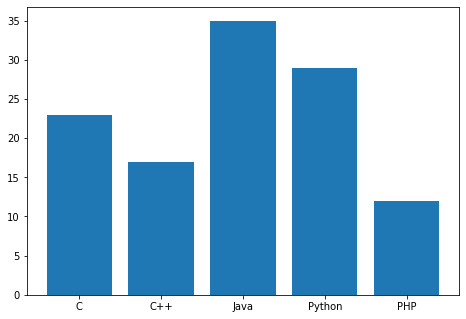

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

In [ ]:
r1.plot('region',['votes', 'ballots_cast_y'],kind = 'bar')


In [ ]:
r1.plot(x='votes',kind='box')